In [28]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import scipy.stats as stats
import scipy.special as sp
import seaborn as sns

In [4]:
def MCMC(nwalker, ndim, log_posterior, nburn, nproduct):
    # initial emsemble
    p0 = np.random.rand(nwalker, ndim)
    sampler = emcee.EnsembleSampler(nwalker, ndim, log_posterior) # log_posterior is a callable
    
    # run a few burn in steps to let walkers explore parameter space
    state = sampler.run_mcmc(p0, nburn)
    sampler.reset()
    
    # run mcmc, production step
    sampler.run_mcmc(state, nproduct)
    
    return sampler.get_chain(flat=True)

In [42]:
# Part I: Coin Tossing
# Uniform distribution
# Posterior distribution of uniform distribution
def log_uniform_posterior(x):
    if x > 0 and x <= 1:
        log_prior = 0
        log_likelihood = np.log(sp.comb(n, h) * x**h * (1 - x)**(n-h))
    else:
        log_prior = -np.inf
        log_likelihood = -np.inf
    return log_prior + log_likelihood

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


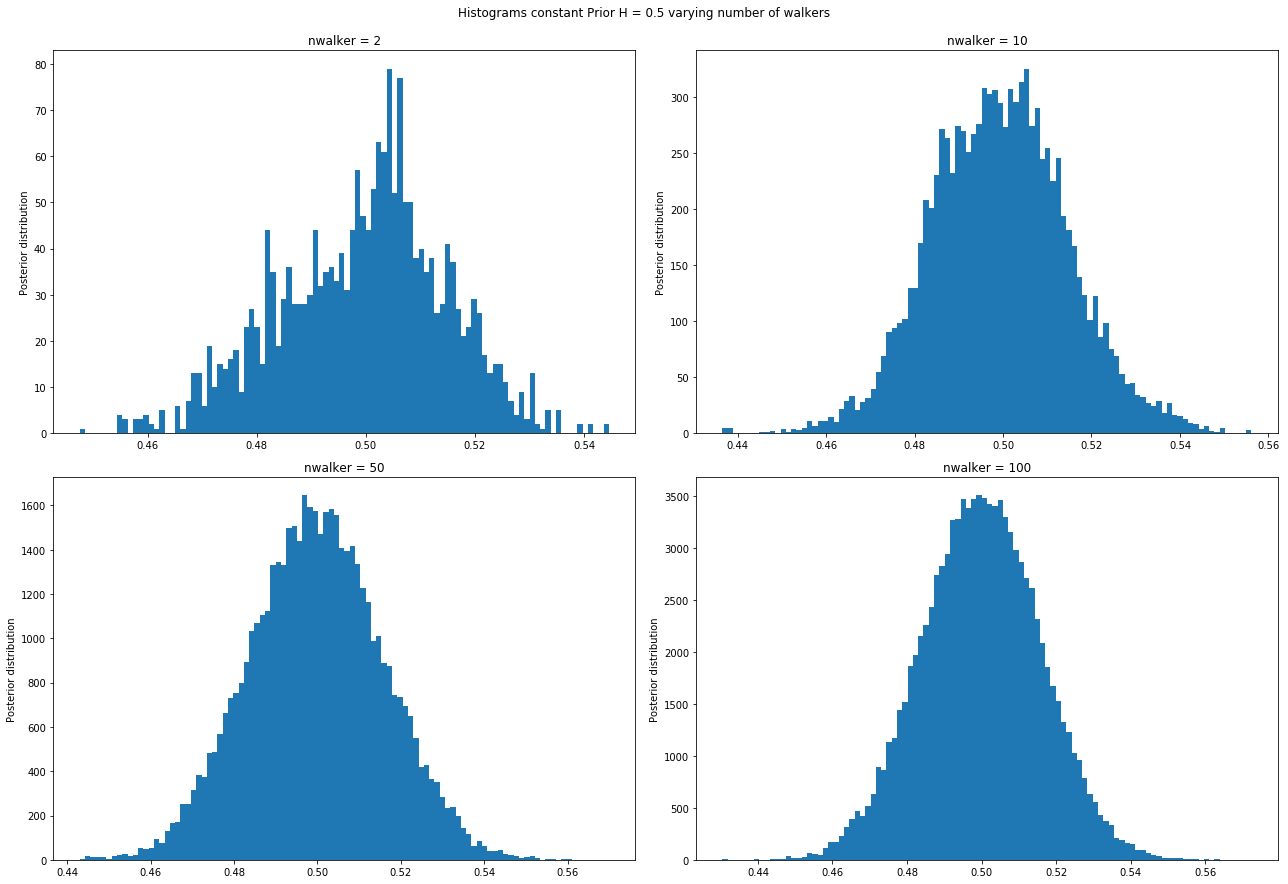

In [43]:
# Uniform distribution with true value H=0.5 
n = 1000
H_true = 0.5
h = np.random.binomial(n, 0.5) # number of heads in randomly generated data
# Varying number of walkers
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms constant Prior H = " + str(H_true) + " varying number of walkers", y = 1.02)

nwalker = [2, 10, 50, 100]
for i in range(len(nwalker)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nwalker = " + str(nwalker[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_uniform = MCMC(nwalker[i], 1, log_uniform_posterior, 100, 1000) 
    ax.hist(posterior_uniform, bins=100)
plt.tight_layout()


# Comments: The distribution gets smoother as the number of walkers increases, the maximum occurs at 0.5 as expected

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


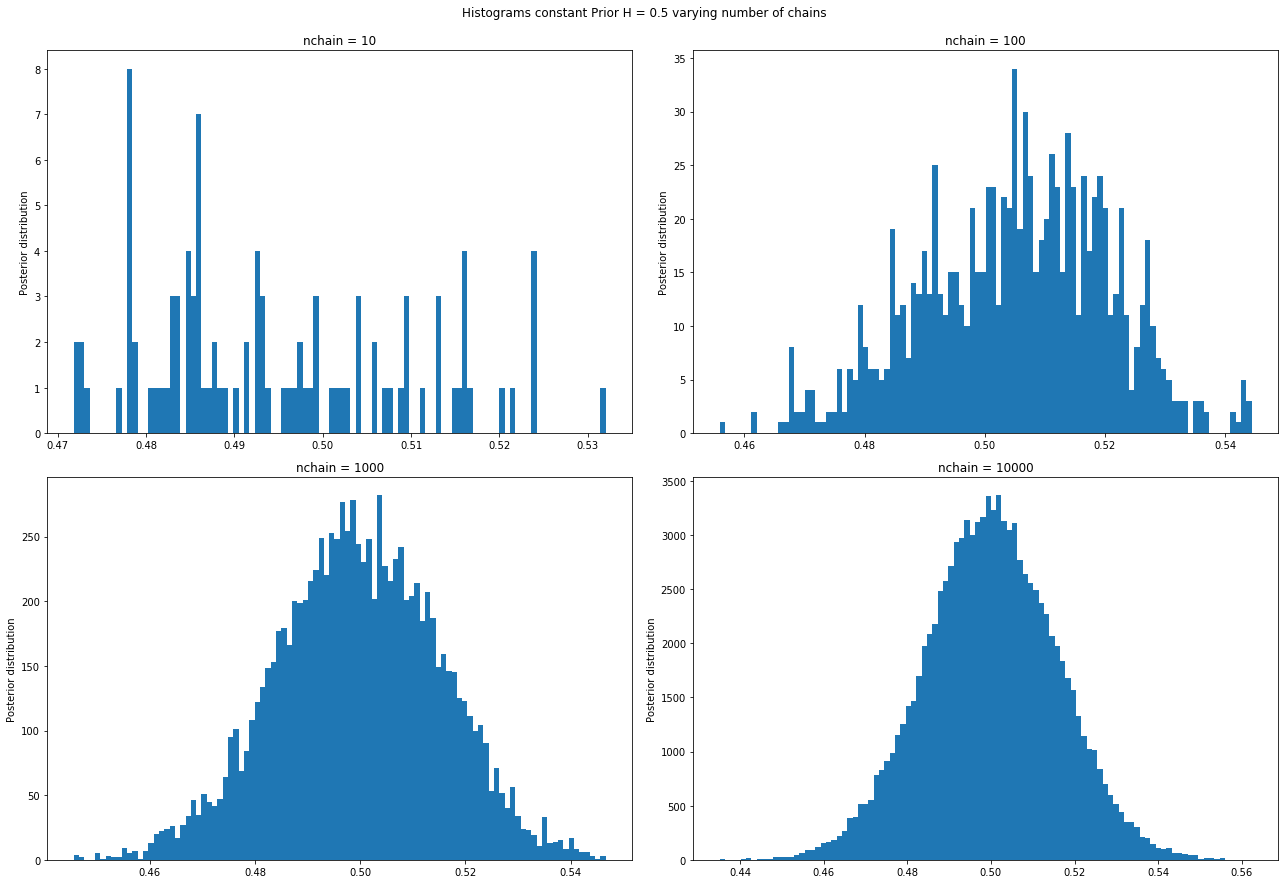

In [45]:
# Varying number of chains (production steps)
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms constant Prior H = " + str(H_true) + " varying number of chains", y = 1.02)

nchain = [10, 100, 1000, 10000]
for i in range(len(nchain)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nchain = " + str(nchain[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_uniform = MCMC(10, 1, log_uniform_posterior, 100, nchain[i]) 
    ax.hist(posterior_uniform, bins=100)
plt.tight_layout()

# Comments: The distribution gets smoother as the number of production steps increases

In [7]:
# Gaussian distribution
# Posterior distribution of gaussian distribution
def log_gaussian_posterior(x):
    if x > 0 and x <= 1:
        log_prior = np.log(stats.norm.pdf(H_true, 0.5, 0.15))
        log_likelihood = np.log(sp.comb(n, h) * x**h * (1 - x)**(n-h))
        return log_prior + log_likelihood
    else: 
        return -np.inf

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


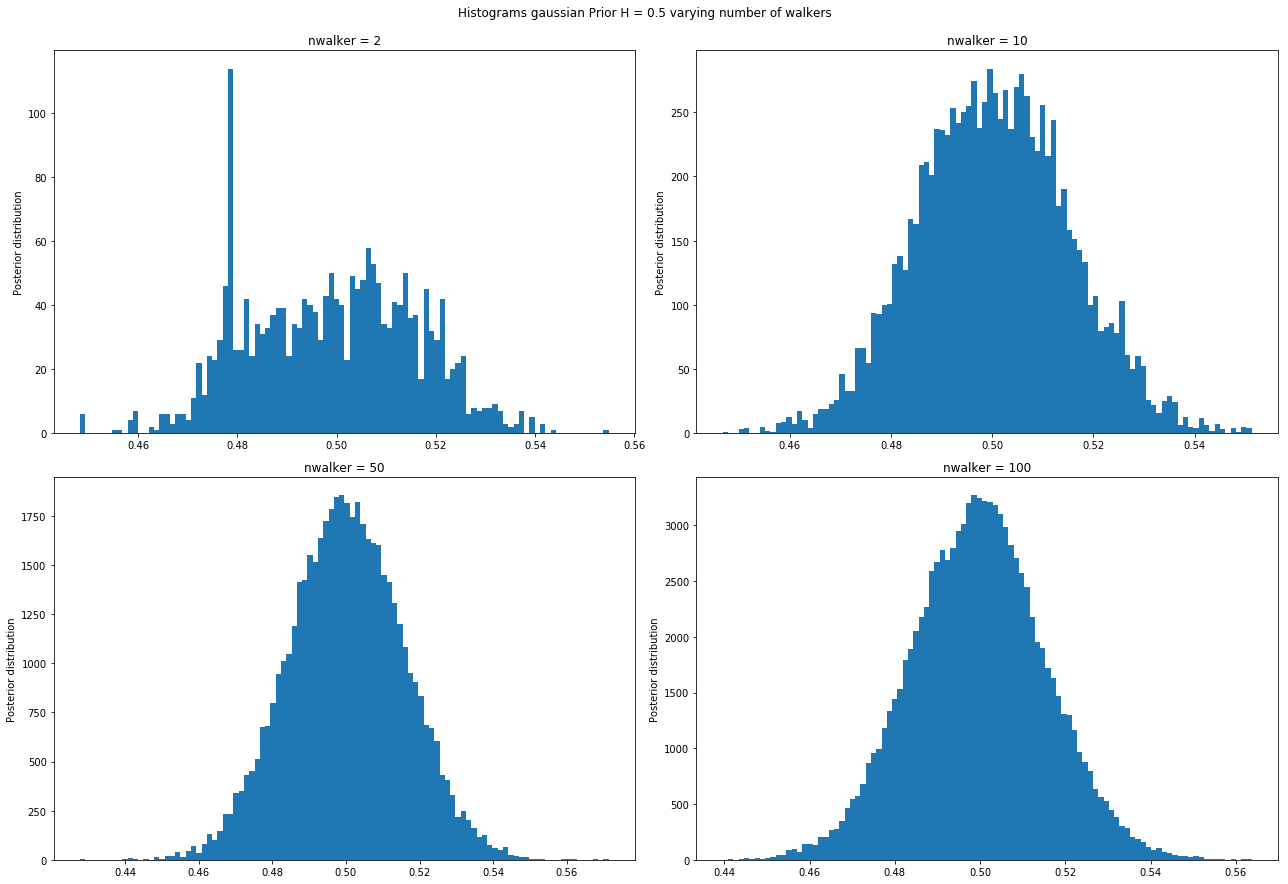

In [8]:
# Try various H_true values for the gaussian distribution
# Gaussian distribution with true value H=0.5 
n = 1000
H_true = 0.5
h = np.random.binomial(n, H_true) # number of heads in randomly generated data
# Varying number of walkers
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms gaussian Prior H = " + str(H_true) + " varying number of walkers", y = 1.02)

nwalker = [2, 10, 50, 100]
for i in range(len(nwalker)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nwalker = " + str(nwalker[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_gaussian_0p5 = MCMC(nwalker[i], 1, log_gaussian_posterior, 100, 1000) 
    ax.hist(posterior_gaussian_0p5, bins=100)
plt.tight_layout()

# Comments: The distribution gets smoother as the number of walkers increases, max is at 0.5 as expected

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


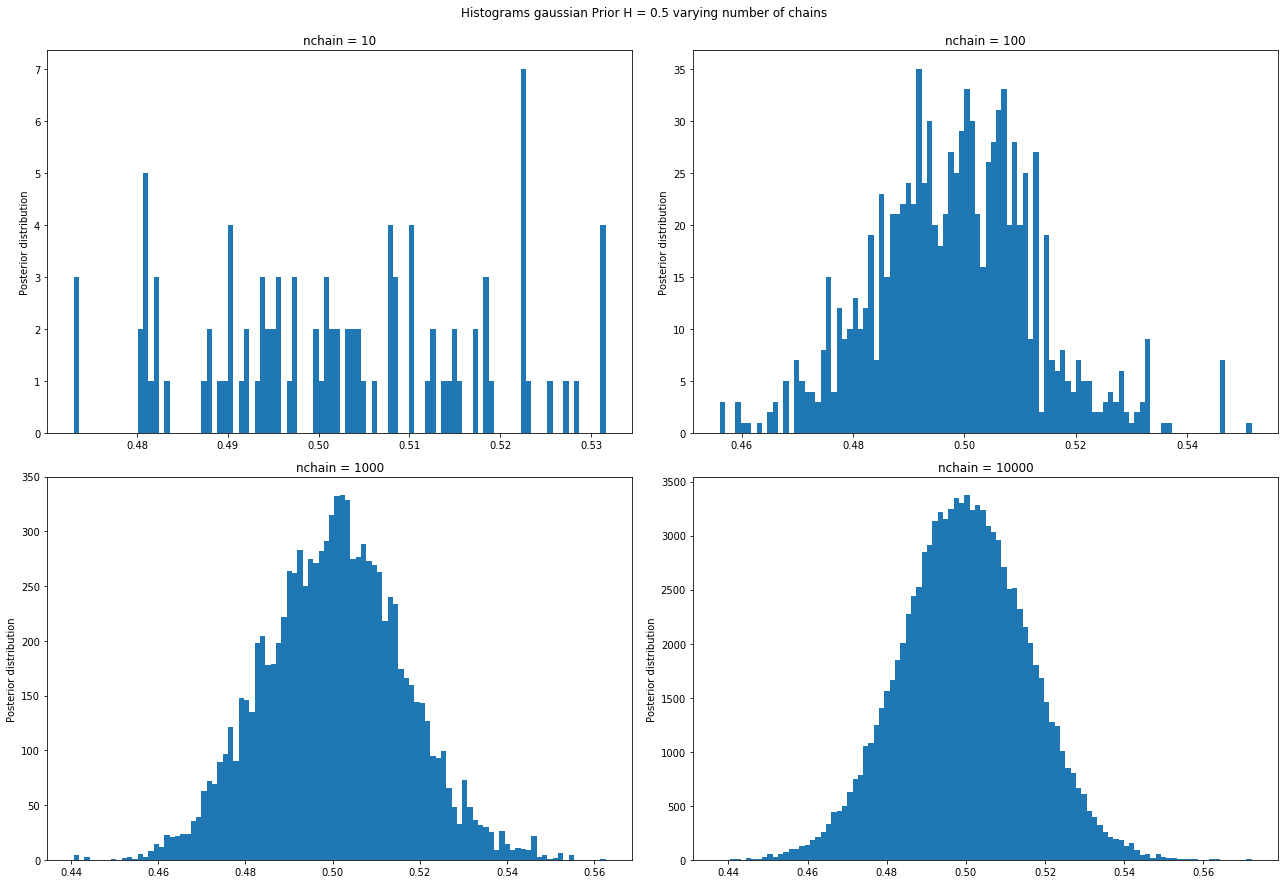

In [9]:
# Varying number of chains (production steps)
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms gaussian Prior H = " + str(H_true) + " varying number of chains", y = 1.02)

nchain = [10, 100, 1000, 10000]
for i in range(len(nchain)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nchain = " + str(nchain[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_gaussian_0p5 = MCMC(10, 1, log_gaussian_posterior, 100, nchain[i]) 
    ax.hist(posterior_gaussian_0p5, bins=100)
plt.tight_layout()

# Comments: The distribution gets smoother as the number of production steps increases, max is at 0.5 as expected

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


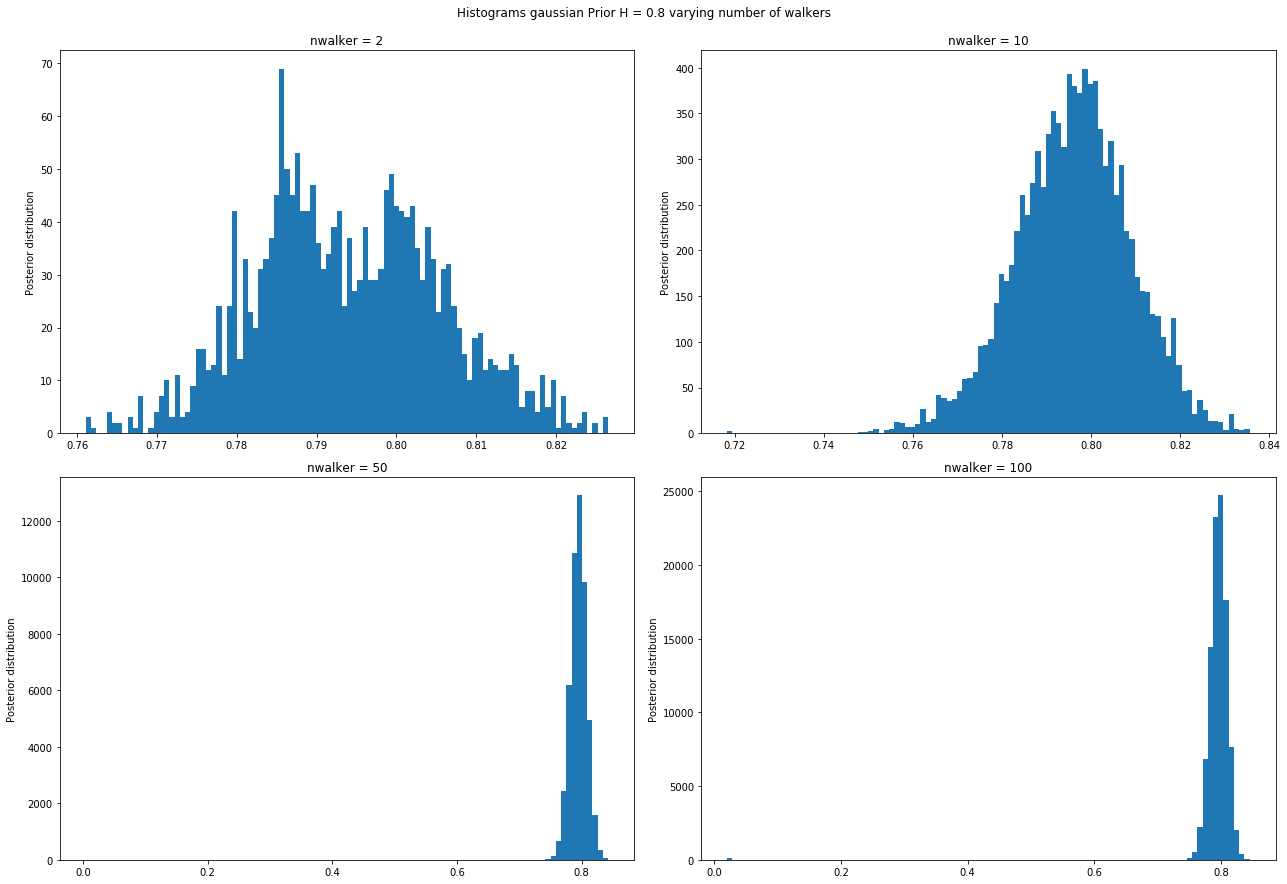

In [10]:
# Gaussian distribution with true value H=0.8
n = 1000
H_true = 0.8
h = np.random.binomial(n, H_true) # number of heads in randomly generated data
# Varying number of walkers
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms gaussian Prior H = " + str(H_true) + " varying number of walkers", y = 1.02)

nwalker = [2, 10, 50, 100]
for i in range(len(nwalker)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nwalker = " + str(nwalker[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_gaussian_0p8 = MCMC(nwalker[i], 1, log_gaussian_posterior, 100, 1000) 
    ax.hist(posterior_gaussian_0p8, bins=100)
plt.tight_layout()

# Comments: The distribution gets smoother as the number of walkers increases, max is at 0.8 as expected

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


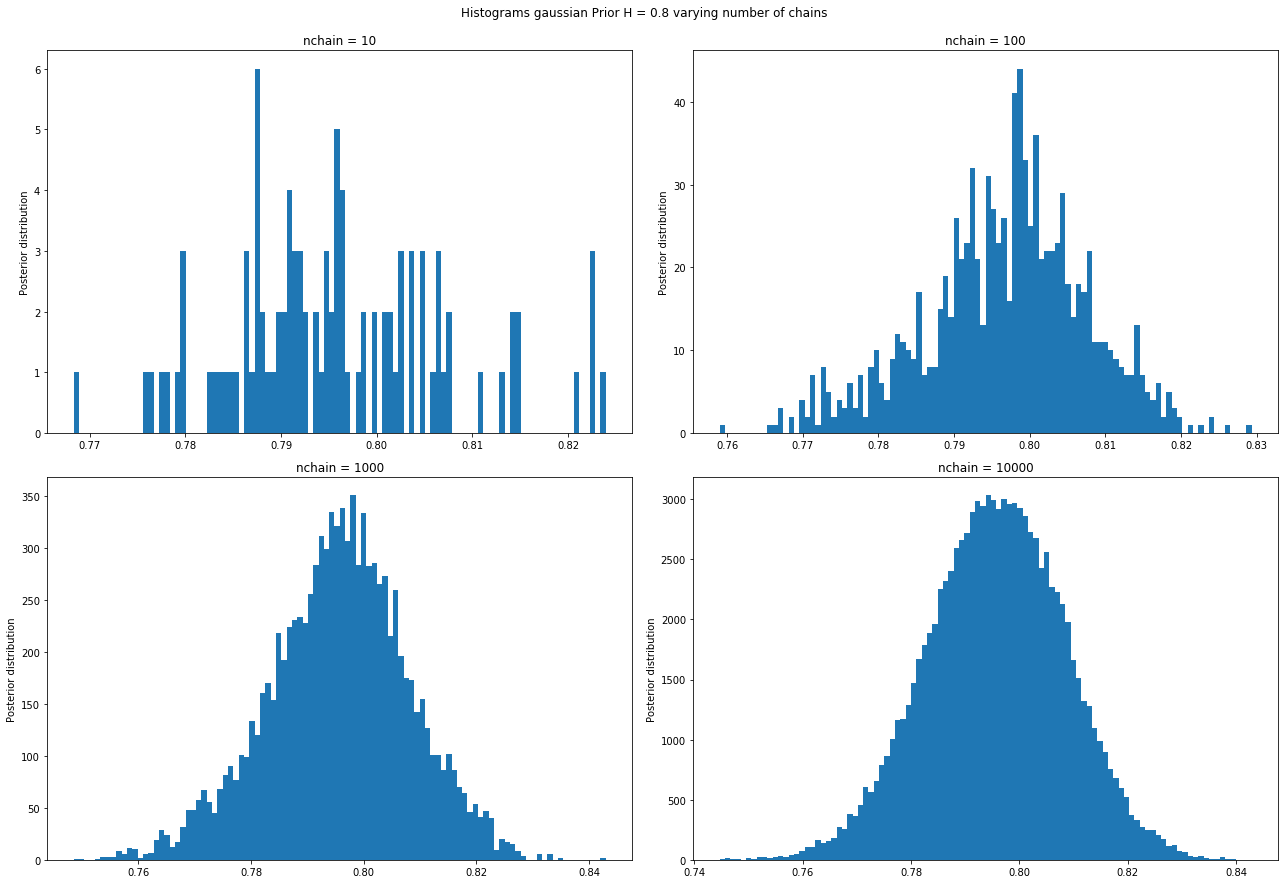

In [13]:
# Varying number of chains (production steps)
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms gaussian Prior H = " + str(H_true) + " varying number of chains", y = 1.02)

nchain = [10, 100, 1000, 10000]
for i in range(len(nchain)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nchain = " + str(nchain[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_gaussian_0p8 = MCMC(10, 1, log_gaussian_posterior, 100, nchain[i]) 
    ax.hist(posterior_gaussian_0p8, bins=100)
plt.tight_layout()

# Comments: The distribution gets smoother as the number of production steps increases, max is at 0.8 as expected

In [14]:
# Try gaussian distribution with different widths:
# Change the width to 0.3
def log_gaussian_posterior_1(x):
    if x > 0 and x <= 1:
        log_prior = np.log(stats.norm.pdf(H_true, 0.5, 0.3))
        log_likelihood = np.log(sp.comb(n, h) * x**h * (1 - x)**(n-h))
        return log_prior + log_likelihood
    else: 
        return -np.inf

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


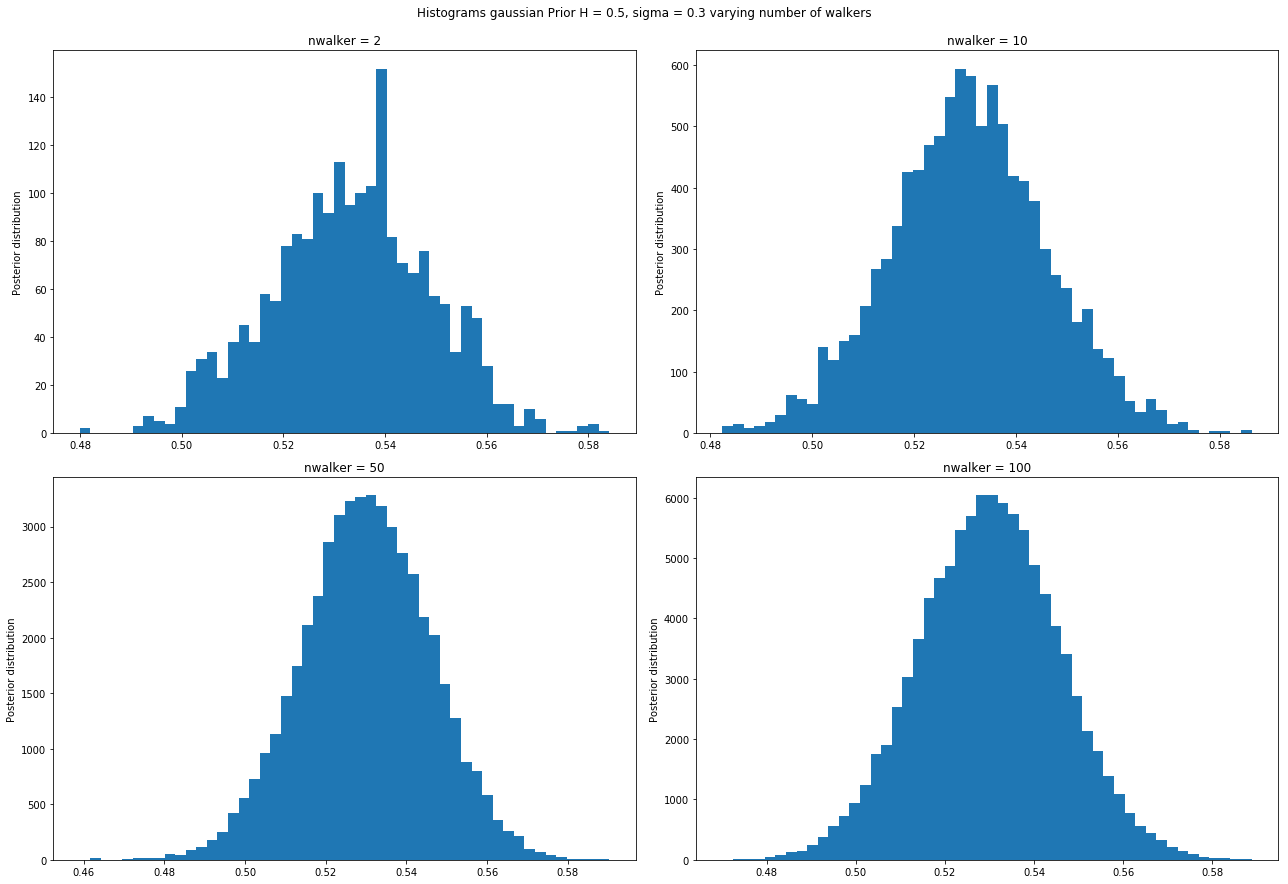

In [16]:
# Gaussian distribution with true value H=0.5
n = 1000
H_true = 0.5
h = np.random.binomial(n, H_true) # number of heads in randomly generated data
# Varying number of walkers
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms gaussian Prior H = " + str(H_true) + ", sigma = 0.3" + " varying number of walkers", y = 1.02)

nwalker = [2, 10, 50, 100]
for i in range(len(nwalker)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nwalker = " + str(nwalker[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_gaussian_0p5_0p3 = MCMC(nwalker[i], 1, log_gaussian_posterior_1, 100, 1000) 
    ax.hist(posterior_gaussian_0p5_0p3, bins=50)
plt.tight_layout()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


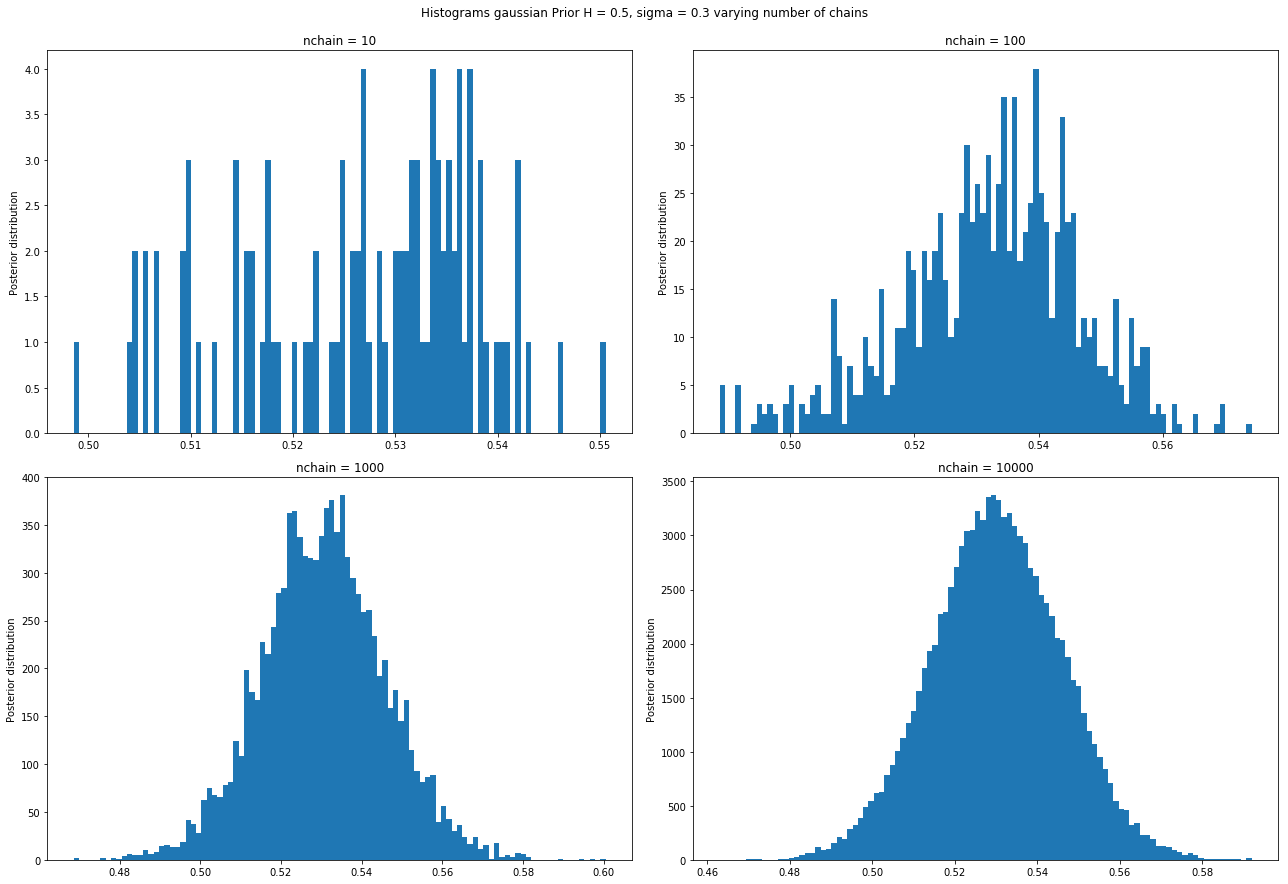

In [17]:
# Varying number of chains (production steps)
fig = plt.figure(figsize = (18, 12))
fig.suptitle("Histograms gaussian Prior H = " + str(H_true) + ", sigma = 0.3" + " varying number of chains", y = 1.02)

nchain = [10, 100, 1000, 10000]
for i in range(len(nchain)):
    ax = fig.add_subplot(2, 2, i + 1) # 2x3 grid, i+1 th plot
    ax.set_title("nchain = " + str(nchain[i]))
    ax.set_ylabel("Posterior distribution")
    posterior_gaussian_0p5_0p3 = MCMC(10, 1, log_gaussian_posterior_1, 100, nchain[i]) 
    ax.hist(posterior_gaussian_0p5_0p3, bins=100)
plt.tight_layout()

In [18]:
# Part II Light House Problem
# Assume that alpha is in [-6, 6] and beta is in [0.1, 12]
# The trues values for alpha and beta are 1 and 6
def get_x_k_and_counts(alpha, beta, N_flashes):
    # Use the lorentzian distribution to generate data for alpha
    np.random.seed()
    flashes = stats.cauchy.rvs(loc=alpha, scale=beta, size=N_flashes)
    # Assume that the detectors are placed at integer values of x
    flashes = np.around(flashes)
    # Then count the number of flashes at each location:
    x_k, counts_x_k = np.unique(flashes, return_counts=True)
    return x_k, counts_x_k

alpha_true = 1
beta_true = 6
N_flashes = 1000

# Assume uniform prior
# x is an array with x = [alpha, beta]
def light_house_log_post(x):
    alpha = x[0]
    beta = x[1]
    if alpha >= -6 and alpha <= 6 and beta >= 0.1 and beta <= 12:
        log_prior = 0
        likelihood_array = -x_k_counts * ((np.log(np.pi * beta) + np.log(1 + (x_k - alpha)**2/beta**2)))
        log_likelihood = np.sum(likelihood_array)
        return log_prior + log_likelihood
    return -np.inf

data = get_x_k_and_counts(alpha_true, beta_true, N_flashes)
x_k = data[0]
x_k_counts = data[1] # x_k and x_k_counts are both global variables

In [ ]:
# Varying the number of walkers
nwalker_light = [6, 10, 50, 100]

for i in range(len(nwalker_light)):
    plt.figure()
    posterior = MCMC(nwalker_light[i], 2, light_house_log_post, 100, 1000)
    sns.jointplot(posterior[:, 0], posterior[:, 1], kind="kde", space=0).set_axis_labels('alpha', 'beta')
    plt.suptitle("Posterior distribution light house with nwalker = " + str(nwalker_light[i]), y=1.01)
    
# The posterior distribution gets more centered at the true values as the number of walkers increases

In [ ]:
# Varying the number of production steps
nchain_light = [10, 100, 1000]
for i in range(len(nchain_light)):
    plt.figure()
    posterior = MCMC(50, 2, light_house_log_post, 100, nchain_light[i])
    sns.jointplot(posterior[:, 0], posterior[:, 1], kind="kde", space=0).set_axis_labels('alpha', 'beta')
    plt.suptitle("Posterior distribution light house with production steps = " + str(nchain_light[i]), y=1.01)
    
# The posterior distribution gets more centered at the true values as the number of production steps increases

Maximum likelihood at 300 number of steps
Location of maximum likelihood: alpha = 1.0303030303030303 beta = 5.629292929292928


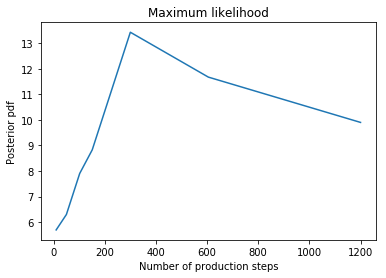

In [73]:
# Maximum Likelihood
production_steps = [10, 50, 102, 151, 300, 605, 1200]
#production_steps = [2,3,4,10, 50]

max_likelihood = np.zeros(len(production_steps))
location_max = np.zeros((len(production_steps), 2))
alpha_prior = np.linspace(-6, 6, 100) # uniform prior for alpha
beta_prior = np.linspace(0.1, 12, 100) # uniform prior for beta

for i in range(len(production_steps)):
    posterior_max = MCMC(30, 2, light_house_log_post, 100, production_steps[i])
    post_pdf = stats.gaussian_kde(np.transpose(posterior_max)) # ndim, length
    log_like = np.zeros((len(alpha_prior), len(beta_prior)))
    for a in range(len(alpha_prior)):
        for b in range(len(beta_prior)):
            log_like[a, b] = post_pdf.pdf((alpha_prior[a], beta_prior[b]))
    likelihood = np.exp(log_like)
    max_likelihood[i] = np.max(likelihood) # find maximum probability in likelihood
    location_max[i, :] = np.unravel_index(np.argmax(likelihood, axis=None), likelihood.shape)

alpha_max_loc = location_max[np.argmax(max_likelihood), 0]
alpha_max = alpha_prior[int(alpha_max_loc)]
beta_max_loc = location_max[np.argmax(max_likelihood), 1]
beta_max = beta_prior[int(beta_max_loc)]
print("Maximum likelihood at " + str(production_steps[int(np.argmax(max_likelihood))]) + " number of steps")
print("Location of maximum likelihood: alpha = " + str(alpha_max) + " beta = " + str(beta_max))
plt.plot(production_steps, max_likelihood)
plt.title("Maximum likelihood")
plt.xlabel("Number of production steps")
plt.ylabel("Posterior pdf")
plt.show()

Text(0.5,1.01,'Posterior distribution of light house with an interloper')

<Figure size 432x288 with 0 Axes>

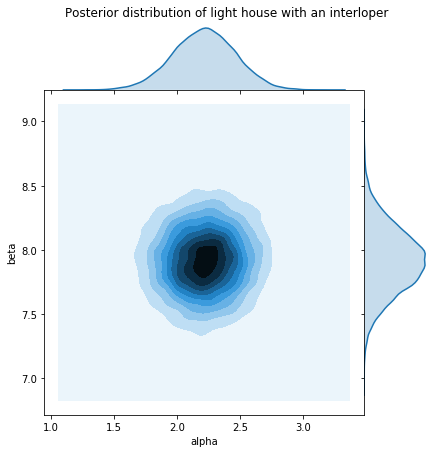

In [85]:
# Interloper
# We generate flashes for both the light house and the interloper
# Light house
alpha_true = 1
beta_true = 6
N_house = 1000 # number of flashes from light house
flashes_house = stats.cauchy.rvs(loc=alpha_true, scale=beta_true, size=N_house)
flashes_house = np.around(flashes_house)

# Interloper
a_true = 4
b_true = 10
N_inter = 1000 # number of flashes from interloper
flashes_inter = stats.cauchy.rvs(loc=a_true, scale=b_true, size=N_inter)
flashes_inter = np.around(flashes_inter)

# Get total flashes array
flashes_tot = np.concatenate((flashes_house, flashes_inter), axis=0)
x_k, x_k_counts = np.unique(flashes_tot, return_counts=True)

posterior_inter = MCMC(50, 2, light_house_log_post, 100, 1000)
plt.figure()
sns.jointplot(posterior_inter[:, 0], posterior_inter[:, 1], kind="kde", space=0).set_axis_labels('alpha', 'beta')
plt.suptitle("Posterior distribution of light house with an interloper", y=1.01)

# The interloper cannot be detected. The detected location is from somewhere in between 
# the interloper and the light house.